In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

Problem 2

a)

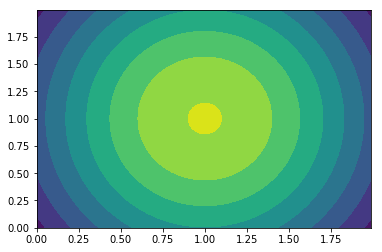

In [43]:
mu = np.array([1, 1])
Sigma = np.array([[1, 0], [0, 2]])

x, y = np.mgrid[0:2:.01, 0:2:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mu, Sigma)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos));

\pagebreak

b)

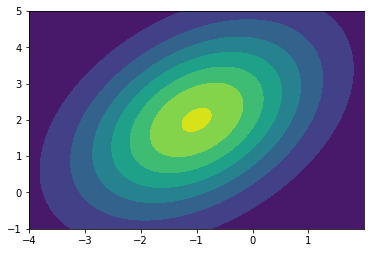

In [36]:
mu = np.array([-1, 2])
Sigma = np.array([[2, 1], [1, 3]])

x, y = np.mgrid[-4:2:.01, -1:5:.01]
pos = np.dstack((x, y))
rv = multivariate_normal(mu, Sigma)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv.pdf(pos));

\pagebreak

c)

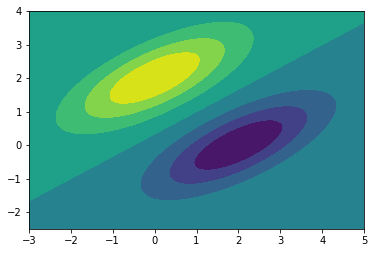

In [41]:
mu1 = np.array([0, 2])
mu2 = [2, 0]
Sigma = np.array([[2, 1], [1, 1]])

x, y = np.mgrid[-3:5:.01, -2.5:4:.01]
pos = np.dstack((x, y))
rv1 = multivariate_normal(mu1, Sigma)
rv2 = multivariate_normal(mu2, Sigma)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv1.pdf(pos) - rv2.pdf(pos));

\pagebreak

d)

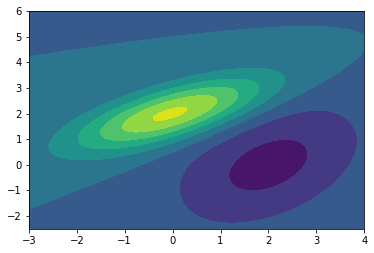

In [52]:
mu1 = np.array([0, 2])
mu2 = [2, 0]
Sigma1 = np.array([[2, 1], [1, 1]])
Sigma2 = np.array([[2, 1], [1, 3]])

x, y = np.mgrid[-3:4:.01, -2.5:6:.01]
pos = np.dstack((x, y))
rv1 = multivariate_normal(mu1, Sigma1)
rv2 = multivariate_normal(mu2, Sigma2)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv1.pdf(pos) - rv2.pdf(pos));

\pagebreak

e)

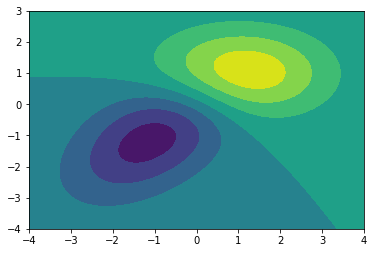

In [54]:
mu1 = np.array([1, 1])
mu2 = [-1, -1]
Sigma1 = np.array([[2, 0], [0, 1]])
Sigma2 = np.array([[2, 1], [1, 2]])

x, y = np.mgrid[-4:4:.01, -4:3:.01]
pos = np.dstack((x, y))
rv1 = multivariate_normal(mu1, Sigma1)
rv2 = multivariate_normal(mu2, Sigma2)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, rv1.pdf(pos) - rv2.pdf(pos));

\pagebreak

Problem 3

a)
sample mean:  [2.68846045 5.3888394 ]

b)
covariance matrix:
[[7.42292904 3.00253936]
 [3.00253936 4.78474509]]

c)
eigenvalues:  [9.38335628 2.82431785]

eigenvectors:
[[ 0.83732346 -0.54670781]
 [ 0.54670781  0.83732346]]

d)


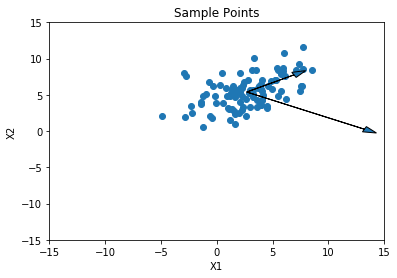

e)


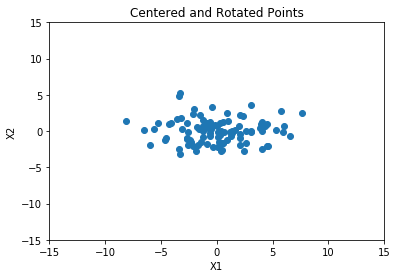

In [177]:
np.random.seed(42)
x1 = np.random.normal(3,3, 100)
x2 = x1*.5 + np.random.normal(4, 2, 100)

x1_mean = np.mean(x1)
x2_mean = np.mean(x2)
sample_mean = np.array([x1_mean, x2_mean])
print('a)')
print('sample mean: ', sample_mean)
print()

Z = np.stack((x1, x2), axis=0)
cov_z = np.cov(Z)
print('b)')
print('covariance matrix:')
print(cov_z)
print()


eigenvals, eigenvecs = np.linalg.eig(cov_z)
print('c)')
print('eigenvalues: ', eigenvals)
print()
print('eigenvectors:')
print(eigenvecs)
print()

print('d)')
plt.subplot(1,1,1)
plt.scatter(x1, x2)
plt.xlim((-15, 15))
plt.ylim((-15, 15))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Sample Points')

vec_1 = eigenvecs[0]*eigenvals[0]
vec_2 = eigenvecs[1]*eigenvals[1]

plt.arrow(x1_mean, x2_mean, x1_mean + vec_1[0], vec_1[1], head_width = .8)
plt.arrow(x1_mean, x2_mean, x1_mean + vec_2[0], vec_2[1], head_width = .8)
plt.show()

print('e)')
x1_centered = x1 - x1_mean
x2_centered = x2 - x2_mean
x_centered = [x1_centered, x2_centered]
x_rotated = np.dot(eigenvecs.T, x_centered)

plt.subplot(1,1,1)
plt.scatter(x_rotated[0], x_rotated[1])
plt.xlim((-15, 15))
plt.ylim((-15, 15))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Centered and Rotated Points');

#z_t = np.stack((x_rotated[0], x_rotated[1]), axis=0)
#cz = np.cov(z_t)

#eigenvals_t, eigenvecs_t = np.linalg.eig(cz)
#vec_1_t = eigenvecs_t[0]*eigenvals_t[0]
#vec_2_t = eigenvecs_t[1]*eigenvals_t[1]

#plt.arrow(0, 0, vec_1_t[0], vec_1_t[1], head_width = .8)
#plt.arrow(0, 0, vec_2_t[0], vec_2_t[1], head_width = .8);

\pagebreak

7)

In [1]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io
from scipy.stats import multivariate_normal

fields = "test_data", "training_data", "training_labels"

mnist = io.loadmat("mnist-data/mnist_data.mat")
for field in fields:
        print(field, mnist[field].shape)
spam = io.loadmat("spam-data/spam_data.mat")
for field in fields:
        print(field, spam[field].shape)   

test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)


a)

In [111]:
mnist_train = pd.DataFrame(mnist['training_data'])

#normalize images
mnist_norms = mnist_train.apply(np.linalg.norm, axis=1)
mnist_train = mnist_train.div(mnist_norms, axis=0)

#match labels with images
mnist_labels = pd.DataFrame(mnist['training_labels'])
mnist_train['labels'] = mnist_labels[0]

#find mean for each class
mu = mnist_train.groupby(['labels']).mean().values
mu.shape

(10, 784)

In [112]:
mnist0 = mnist_train[mnist_train['labels']==0].drop('labels', axis=1)
mnist1 = mnist_train[mnist_train['labels']==1].drop('labels', axis=1)
mnist2 = mnist_train[mnist_train['labels']==2].drop('labels', axis=1)
mnist3 = mnist_train[mnist_train['labels']==3].drop('labels', axis=1)
mnist4 = mnist_train[mnist_train['labels']==4].drop('labels', axis=1)
mnist5 = mnist_train[mnist_train['labels']==5].drop('labels', axis=1)
mnist6 = mnist_train[mnist_train['labels']==6].drop('labels', axis=1)
mnist7 = mnist_train[mnist_train['labels']==7].drop('labels', axis=1)
mnist8 = mnist_train[mnist_train['labels']==8].drop('labels', axis=1)
mnist9 = mnist_train[mnist_train['labels']==9].drop('labels', axis=1)

In [113]:
#find covariance matrix for each class
Sigmas = mnist_train.groupby('labels').apply(lambda x: np.cov(x.drop('labels', axis=1), rowvar=False, bias=True))
Sigmas

labels
0    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
4    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
5    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
6    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
7    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
8    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
9    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
dtype: object

In [119]:
p0 = multivariate_normal.pdf(mnist0, mu[0], Sigmas[0], allow_singular=True)
p1 = multivariate_normal.pdf(mnist1, mu[1], Sigmas[1], allow_singular=True)
p2 = multivariate_normal.pdf(mnist2, mu[2], Sigmas[2], allow_singular=True)
p3 = multivariate_normal.pdf(mnist3, mu[3], Sigmas[3], allow_singular=True)
p4 = multivariate_normal.pdf(mnist4, mu[4], Sigmas[4], allow_singular=True)
p5 = multivariate_normal.pdf(mnist5, mu[5], Sigmas[5], allow_singular=True)
p6 = multivariate_normal.pdf(mnist6, mu[6], Sigmas[6], allow_singular=True)
p7 = multivariate_normal.pdf(mnist7, mu[7], Sigmas[7], allow_singular=True)
p8 = multivariate_normal.pdf(mnist8, mu[8], Sigmas[8], allow_singular=True)
p9 = multivariate_normal.pdf(mnist9, mu[9], Sigmas[9], allow_singular=True)

\pagebreak

b)

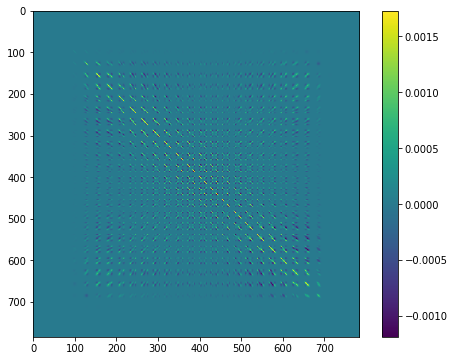

In [120]:
plt.figure(figsize=(8,6))
plt.imshow(Sigmas[0])
plt.colorbar();

The diagonal terms are larger than the off-diagonal terms, so we can conclude that the covariance of a variable with itself (the variance) is higher than the covariance with other variables, and the values along the diagonal have the most influence 

\pagebreak

c)

1)

In [26]:
def lda(mu_c, Sigma_inv, x, pi_c):
    return np.dot(mu_c.T, np.dot(Sigma_inv, x)) - .5 * np.dot(mu_c, np.dot(Sigma_inv, mu_c.T)) + np.log(pi_c)

In [27]:
def train_val_split(data, split_val):
    np.random.seed(42)
    np.random.shuffle(data)
    train = data[:split_val]
    validation = data[split_val:]
    return train, validation

In [28]:
mnist_train, mnist_validation = train_val_split(mnist['training_data'], 50000)
mnist_train_labels, mnist_validation_labels = train_val_split(mnist['training_labels'], 50000)

In [29]:
mnist_train_df = pd.DataFrame(mnist_train)
mnist_val_df = pd.DataFrame(mnist_validation)

#normalize images
mnist_train_norms = mnist_train_df.apply(np.linalg.norm, axis=1)
mnist_val_norms = mnist_val_df.apply(np.linalg.norm, axis=1)
mnist_train_df = mnist_train_df.div(mnist_train_norms, axis=0)
mnist_val_df = mnist_val_df.div(mnist_val_norms, axis=0)

#match labels with images
mnist_train_labels_df = pd.DataFrame(mnist_train_labels)
mnist_val_labels_df = pd.DataFrame(mnist_validation_labels)

In [31]:
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]


validation_error0 = []
validation_error1 = []
validation_error2 = []
validation_error3 = []
validation_error4 = []
validation_error5 = []
validation_error6 = []
validation_error7 = []
validation_error8 = []
validation_error9 = []

for size in sample_sizes:
    mnist_train_example = mnist_train_df[:size]
    mnist_train_example['labels'] = mnist_train_labels_df[0]
    
    #find mean for each class
    mu = mnist_train_example.groupby(['labels']).apply(lambda x: x.drop('labels', axis=1).mean()).values
    
    #find covariance matrix for each class
    Sigmas = mnist_train_example.groupby('labels').apply(lambda x: np.cov(x.drop('labels', axis=1), rowvar=False, bias=True))
    
    #find average covariance matrix
    Sigma = np.mean(Sigmas)
    
    eigvals, eigvecs = np.linalg.eig(Sigma) 

    min_val = min([eigval for eigval in eigvals if eigval > 1e-6])
    
    i = 0
    for row in Sigma:
        row[i] += min_val
        i += 1
        
    Sigma_inv = np.linalg.solve(Sigma, np.eye(784))
    
    p0 = lda(mu[0], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==0])/10000)
    p1 = lda(mu[1], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==1])/10000)
    p2 = lda(mu[2], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==2])/10000)
    p3 = lda(mu[3], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==3])/10000)
    p4 = lda(mu[4], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==4])/10000)
    p5 = lda(mu[5], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==5])/10000)
    p6 = lda(mu[6], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==6])/10000)
    p7 = lda(mu[7], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==7])/10000)
    p8 = lda(mu[8], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==8])/10000)
    p9 = lda(mu[9], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==9])/10000)
    
    probs = pd.DataFrame({0:p0, 1:p1, 2:p2, 3:p3, 4:p4, 5:p5, 6:p6, 7:p7, 8:p8, 9:p9}).T
    validation_preds = probs.idxmax()
    
    error0 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 0 and validation_preds[i] != 0 or mnist_val_labels_df.values[i]!=0 and validation_preds[i]==0)])/10000
    error1 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 1 and validation_preds[i] != 1 or mnist_val_labels_df.values[i]!=1 and validation_preds[i]==1)])/10000
    error2 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 2 and validation_preds[i] != 2 or mnist_val_labels_df.values[i]!=2 and validation_preds[i]==2)])/10000
    error3 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 3 and validation_preds[i] != 3 or mnist_val_labels_df.values[i]!=3 and validation_preds[i]==3)])/10000
    error4 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 4 and validation_preds[i] != 4 or mnist_val_labels_df.values[i]!=4 and validation_preds[i]==4)])/10000
    error5 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 5 and validation_preds[i] != 5 or mnist_val_labels_df.values[i]!=5 and validation_preds[i]==5)])/10000
    error6 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 6 and validation_preds[i] != 6 or mnist_val_labels_df.values[i]!=6 and validation_preds[i]==6)])/10000
    error7 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 7 and validation_preds[i] != 7 or mnist_val_labels_df.values[i]!=7 and validation_preds[i]==7)])/10000
    error8 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 8 and validation_preds[i] != 8 or mnist_val_labels_df.values[i]!=8 and validation_preds[i]==8)])/10000
    error9 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 9 and validation_preds[i] != 9 or mnist_val_labels_df.values[i]!=9 and validation_preds[i]==9)])/10000
    
    validation_error0 = np.append(validation_error0, error0)
    validation_error1 = np.append(validation_error1, error1)
    validation_error2 = np.append(validation_error2, error2)
    validation_error3 = np.append(validation_error3, error3)
    validation_error4 = np.append(validation_error4, error4)
    validation_error5 = np.append(validation_error5, error5)
    validation_error6 = np.append(validation_error6, error6)
    validation_error7 = np.append(validation_error7, error7)
    validation_error8 = np.append(validation_error8, error8)
    validation_error9 = np.append(validation_error9, error9)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: ComplexWarning: Casting complex values to real discards the imaginary part


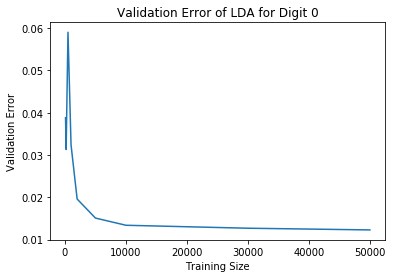

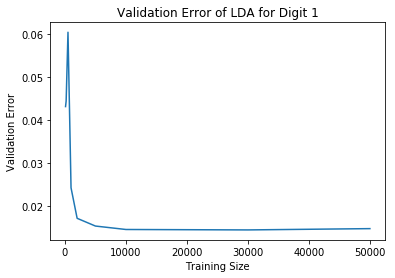

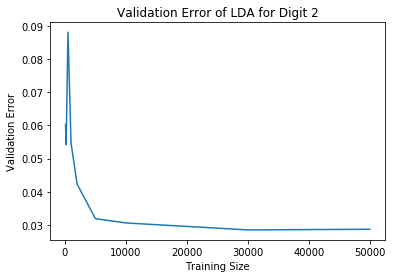

In [32]:
plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error0)
plt.title('Validation Error of LDA for Digit 0')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error1)
plt.title('Validation Error of LDA for Digit 1')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error2)
plt.title('Validation Error of LDA for Digit 2')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()



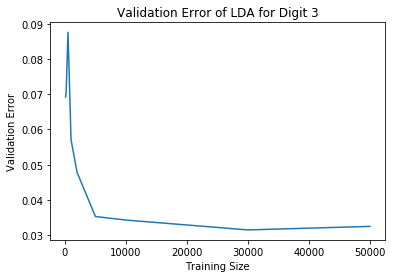

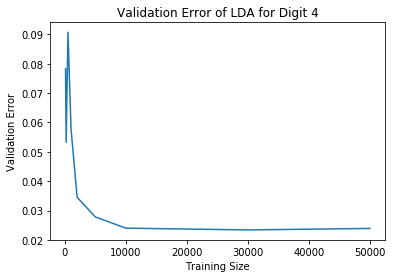

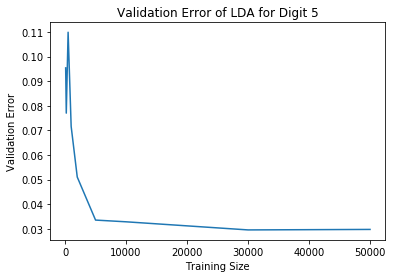

In [33]:
plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error3)
plt.title('Validation Error of LDA for Digit 3')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error4)
plt.title('Validation Error of LDA for Digit 4')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error5)
plt.title('Validation Error of LDA for Digit 5')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()



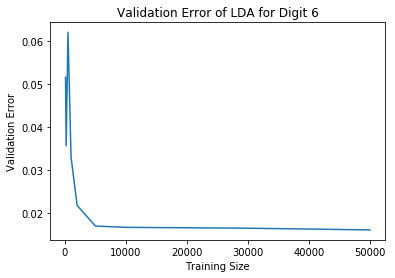

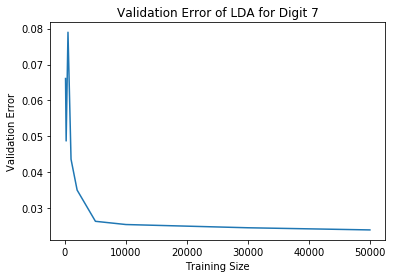

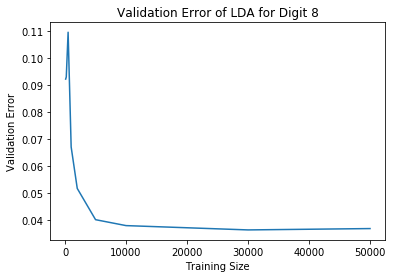

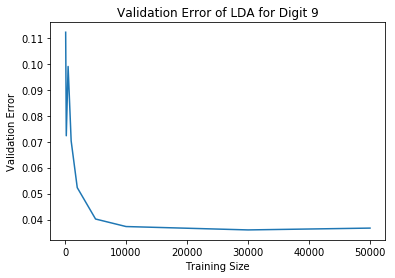

In [34]:
plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error6)
plt.title('Validation Error of LDA for Digit 6')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error7)
plt.title('Validation Error of LDA for Digit 7')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error8)
plt.title('Validation Error of LDA for Digit 8')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error9)
plt.title('Validation Error of LDA for Digit 9')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

\pagebreak

c)

2)

In [35]:
def qda(Sigma_inv_c, log_det_Sigma_c, x, pi_c):
    return -.5 * np.dot((x).T, np.dot(Sigma_inv_c, x)) - .5 * log_det_Sigma_c + np.log(pi_c)

In [36]:
mnist_train, mnist_validation = train_val_split(mnist['training_data'], 50000)
mnist_train_labels, mnist_validation_labels = train_val_split(mnist['training_labels'], 50000)

In [37]:
mnist_train_df = pd.DataFrame(mnist_train)
mnist_val_df = pd.DataFrame(mnist_validation)

#normalize images
mnist_train_norms = mnist_train_df.apply(np.linalg.norm, axis=1)
mnist_val_norms = mnist_val_df.apply(np.linalg.norm, axis=1)
mnist_train_df = mnist_train_df.div(mnist_train_norms, axis=0)
mnist_val_df = mnist_val_df.div(mnist_val_norms, axis=0)

#match labels with images
mnist_train_labels_df = pd.DataFrame(mnist_train_labels)
mnist_val_labels_df = pd.DataFrame(mnist_validation_labels)

In [16]:
sample_sizes = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]

validation_error0 = []
validation_error1 = []
validation_error2 = []
validation_error3 = []
validation_error4 = []
validation_error5 = []
validation_error6 = []
validation_error7 = []
validation_error8 = []
validation_error9 = []


validation_preds = []

for size in sample_sizes:
    mnist_train_example = mnist_train_df[:size]
    mnist_train_example['labels'] = mnist_train_labels_df[0]
    
    #find mean for each class
    mu = mnist_train_example.groupby(['labels']).apply(lambda x: x.drop('labels', axis=1).mean()).values
    
    #find covariance matrix for each class
    Sigmas = mnist_train_example.groupby('labels').apply(lambda x: np.cov(x.drop('labels', axis=1), rowvar=False, bias=True))
    
    
    for i in np.arange(10):
        eigvals, eigvecs = np.linalg.eig(Sigmas[i])
        min_val = min([eigval for eigval in eigvals if eigval > 1e-5])
        j = 0
        for row in Sigmas[i]:
            row[j] += 1 #for some reason only a very large number was doing anything for me
            j += 1
        
    '''
    #Sigmas for each class                   
    Sigma_inv0 = np.linalg.inv(Sigmas[0])
    s, Sigma_log_det0 = np.linalg.slogdet(Sigmas[0])
    
    Sigma_inv1 = np.linalg.inv(Sigmas[1])
    s, Sigma_log_det1 = np.linalg.slogdet(Sigmas[1])
    
    Sigma_inv2 = np.linalg.inv(Sigmas[2])
    s, Sigma_log_det2 = np.linalg.slogdet(Sigmas[2])
    
    Sigma_inv3 = np.linalg.inv(Sigmas[3])
    s, Sigma_log_det3 = np.linalg.slogdet(Sigmas[3])
    
    Sigma_inv4 = np.linalg.inv(Sigmas[4])
    s, Sigma_log_det4 = np.linalg.slogdet(Sigmas[4])
    
    Sigma_inv5 = np.linalg.inv(Sigmas[5])
    s, Sigma_log_det5 = np.linalg.slogdet(Sigmas[5])
    
    Sigma_inv6 = np.linalg.inv(Sigmas[6])
    s, Sigma_log_det6 = np.linalg.slogdet(Sigmas[6])
    
    Sigma_inv7 = np.linalg.inv(Sigmas[7])
    s, Sigma_log_det7 = np.linalg.slogdet(Sigmas[7])
    
    Sigma_inv8 = np.linalg.inv(Sigmas[8])
    s, Sigma_log_det8 = np.linalg.slogdet(Sigmas[8])
    
    Sigma_inv9 = np.linalg.inv(Sigmas[9])
    s, Sigma_log_det9 = np.linalg.slogdet(Sigmas[9])
    
    #subtract mean from data
    x0 = mnist_val_df.subtract(np.tile(mu[0], (10000, 1))).T
    x1 = mnist_val_df.subtract(np.tile(mu[1], (10000, 1))).T
    x2 = mnist_val_df.subtract(np.tile(mu[2], (10000, 1))).T
    x3 = mnist_val_df.subtract(np.tile(mu[3], (10000, 1))).T
    x4 = mnist_val_df.subtract(np.tile(mu[4], (10000, 1))).T
    x5 = mnist_val_df.subtract(np.tile(mu[5], (10000, 1))).T
    x6 = mnist_val_df.subtract(np.tile(mu[6], (10000, 1))).T
    x7 = mnist_val_df.subtract(np.tile(mu[7], (10000, 1))).T
    x8 = mnist_val_df.subtract(np.tile(mu[8], (10000, 1))).T
    x9 = mnist_val_df.subtract(np.tile(mu[9], (10000, 1))).T
    
    
    pi0 = len(mnist_train_labels_df[mnist_train_labels_df[0]==0])/10000
    pi1 = len(mnist_train_labels_df[mnist_train_labels_df[0]==1])/10000
    pi2 = len(mnist_train_labels_df[mnist_train_labels_df[0]==2])/10000
    pi3 = len(mnist_train_labels_df[mnist_train_labels_df[0]==3])/10000
    pi4 = len(mnist_train_labels_df[mnist_train_labels_df[0]==4])/10000
    pi5 = len(mnist_train_labels_df[mnist_train_labels_df[0]==5])/10000
    pi6 = len(mnist_train_labels_df[mnist_train_labels_df[0]==6])/10000
    pi7 = len(mnist_train_labels_df[mnist_train_labels_df[0]==7])/10000
    pi8 = len(mnist_train_labels_df[mnist_train_labels_df[0]==8])/10000
    pi9 = len(mnist_train_labels_df[mnist_train_labels_df[0]==9])/10000
    '''
    
    
    p0 = multivariate_normal.pdf(mnist_val_df.values, mu[0], Sigmas[0])
    p1 = multivariate_normal.pdf(mnist_val_df.values, mu[1], Sigmas[1])
    p2 = multivariate_normal.pdf(mnist_val_df.values, mu[2], Sigmas[2])
    p3 = multivariate_normal.pdf(mnist_val_df.values, mu[3], Sigmas[3])
    p4 = multivariate_normal.pdf(mnist_val_df.values, mu[4], Sigmas[4])
    p5 = multivariate_normal.pdf(mnist_val_df.values, mu[5], Sigmas[5])
    p6 = multivariate_normal.pdf(mnist_val_df.values, mu[6], Sigmas[6])
    p7 = multivariate_normal.pdf(mnist_val_df.values, mu[7], Sigmas[7])
    p8 = multivariate_normal.pdf(mnist_val_df.values, mu[8], Sigmas[8])
    p9 = multivariate_normal.pdf(mnist_val_df.values, mu[9], Sigmas[9])
    
    
    ''' #The QDA function I wrote was too slow in comparison to multivariate_normal
    p0 = qda(Sigma_inv0, Sigma_log_det0, x0, pi0)
    p1 = qda(Sigma_inv1, Sigma_log_det1, x1, pi1)
    p2 = qda(Sigma_inv2, Sigma_log_det2, x2, pi2)
    p3 = qda(Sigma_inv3, Sigma_log_det3, x3, pi3)
    p4 = qda(Sigma_inv4, Sigma_log_det4, x4, pi4)
    p5 = qda(Sigma_inv5, Sigma_log_det5, x5, pi5)
    p6 = qda(Sigma_inv6, Sigma_log_det6, x6, pi6)
    p7 = qda(Sigma_inv7, Sigma_log_det7, x7, pi7)
    p8 = qda(Sigma_inv8, Sigma_log_det8, x8, pi8)
    p9 = qda(Sigma_inv9, Sigma_log_det9, x9, pi9)
    print(p0)'''
        
    probabs = pd.DataFrame([p0, p1, p2, p3, p4, p5, p6, p7, p8, p9]).T
    validation_preds = probabs.T.idxmax()
    
    error0 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 0 and validation_preds[i] != 0 or mnist_val_labels_df.values[i]!=0 and validation_preds[i]==0)])/10000
    error1 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 1 and validation_preds[i] != 1 or mnist_val_labels_df.values[i]!=1 and validation_preds[i]==1)])/10000
    error2 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 2 and validation_preds[i] != 2 or mnist_val_labels_df.values[i]!=2 and validation_preds[i]==2)])/10000
    error3 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 3 and validation_preds[i] != 3 or mnist_val_labels_df.values[i]!=3 and validation_preds[i]==3)])/10000
    error4 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 4 and validation_preds[i] != 4 or mnist_val_labels_df.values[i]!=4 and validation_preds[i]==4)])/10000
    error5 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 5 and validation_preds[i] != 5 or mnist_val_labels_df.values[i]!=5 and validation_preds[i]==5)])/10000
    error6 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 6 and validation_preds[i] != 6 or mnist_val_labels_df.values[i]!=6 and validation_preds[i]==6)])/10000
    error7 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 7 and validation_preds[i] != 7 or mnist_val_labels_df.values[i]!=7 and validation_preds[i]==7)])/10000
    error8 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 8 and validation_preds[i] != 8 or mnist_val_labels_df.values[i]!=8 and validation_preds[i]==8)])/10000
    error9 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 9 and validation_preds[i] != 9 or mnist_val_labels_df.values[i]!=9 and validation_preds[i]==9)])/10000
    
    validation_error0 = np.append(validation_error0, error0)
    validation_error1 = np.append(validation_error1, error1)
    validation_error2 = np.append(validation_error2, error2)
    validation_error3 = np.append(validation_error3, error3)
    validation_error4 = np.append(validation_error4, error4)
    validation_error5 = np.append(validation_error5, error5)
    validation_error6 = np.append(validation_error6, error6)
    validation_error7 = np.append(validation_error7, error7)
    validation_error8 = np.append(validation_error8, error8)
    validation_error9 = np.append(validation_error9, error9)
    
 train

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


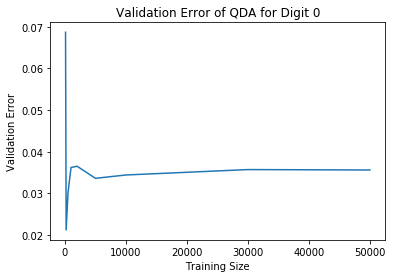

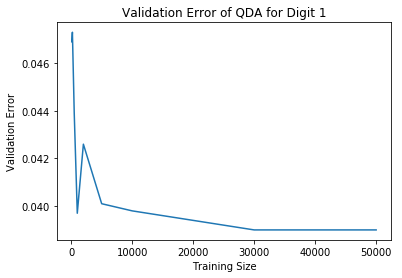

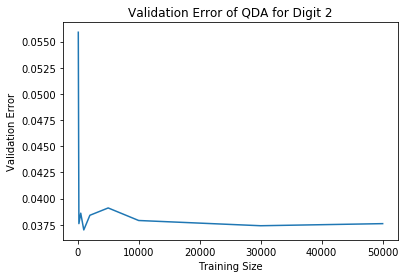

In [20]:
plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error0)
plt.title('Validation Error of QDA for Digit 0')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error1)
plt.title('Validation Error of QDA for Digit 1')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error2)
plt.title('Validation Error of QDA for Digit 2')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()



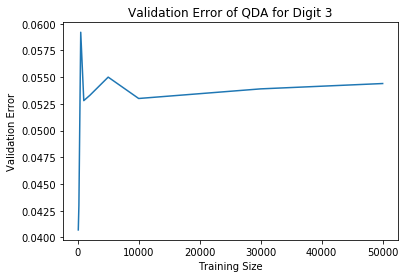

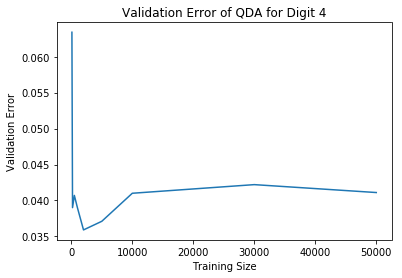

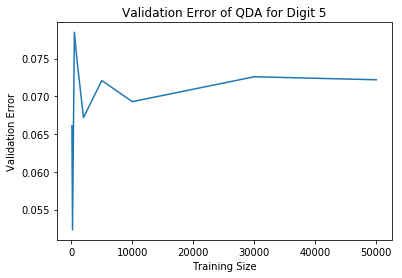

In [23]:
plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error3)
plt.title('Validation Error of QDA for Digit 3')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error4)
plt.title('Validation Error of QDA for Digit 4')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error5)
plt.title('Validation Error of QDA for Digit 5')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

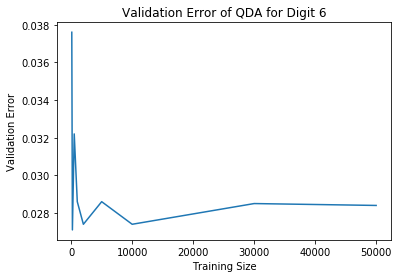

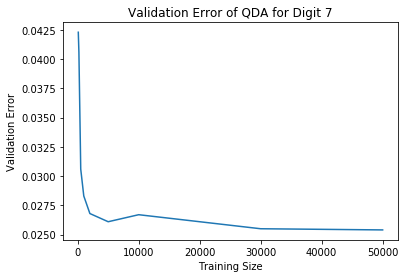

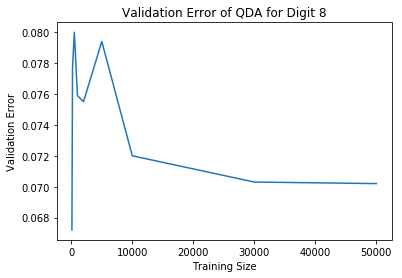

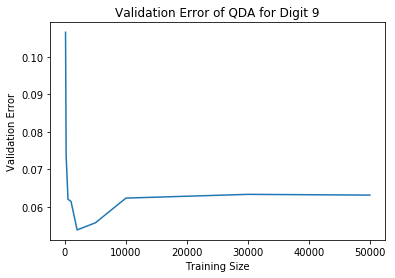

In [24]:
plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error6)
plt.title('Validation Error of QDA for Digit 6')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error7)
plt.title('Validation Error of QDA for Digit 7')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error8)
plt.title('Validation Error of QDA for Digit 8')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

plt.subplot(1,1,1)
plt.plot(sample_sizes, validation_error9)
plt.title('Validation Error of QDA for Digit 9')
plt.xlabel('Training Size')
plt.ylabel('Validation Error')
plt.show()

\pagebreak

c)

3)

LDA performed slightly better, as it was more often approaching smaller errors than QDA did.
This is probably because the MNIST data set is so messy that having a quadratic could 
introduce a little overfitting while a linear classification might draw more sensible boundaries.

\pagebreak

4)

In [38]:
mnist_train_df = pd.DataFrame(mnist['training_data'])
mnist_test_df = pd.DataFrame(mnist['test_data'])

#normalize images
mnist_train_norms = mnist_train_df.apply(np.linalg.norm, axis=1)
mnist_train_df = mnist_train_df.div(mnist_train_norms, axis=0)
mnist_test_norms = mnist_test_df.apply(np.linalg.norm, axis=1)
mnist_test_df = mnist_test_df.div(mnist_test_norms, axis=0)

#match labels with images
mnist_train_labels_df = pd.DataFrame(mnist_train_labels)

In [41]:
#test submission
mnist_train_df['labels'] = mnist_train_labels_df[0]
    
#find mean for each class
mu = mnist_train_df.groupby(['labels']).apply(lambda x: x.drop('labels', axis=1).mean()).values
    
#find covariance matrix for each class
Sigmas = mnist_train_df.groupby('labels').apply(lambda x: np.cov(x.drop('labels', axis=1), rowvar=False, bias=True))
    
#find average covariance matrix
Sigma = np.mean(Sigmas)
    
eigvals, eigvecs = np.linalg.eig(Sigma) 

#find value to add to diagonal
min_val = min([eigval for eigval in eigvals if eigval > 1e-6])
    
i = 0
for row in Sigma:
    row[i] += min_val
    i += 1
        
Sigma_inv = np.linalg.solve(Sigma, np.eye(784))
    
p0 = lda(mu[0], Sigma_inv, mnist_test_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==0])/10000)
p1 = lda(mu[1], Sigma_inv, mnist_test_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==1])/10000)
p2 = lda(mu[2], Sigma_inv, mnist_test_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==2])/10000)
p3 = lda(mu[3], Sigma_inv, mnist_test_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==3])/10000)
p4 = lda(mu[4], Sigma_inv, mnist_test_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==4])/10000)
p5 = lda(mu[5], Sigma_inv, mnist_test_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==5])/10000)
p6 = lda(mu[6], Sigma_inv, mnist_test_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==6])/10000)
p7 = lda(mu[7], Sigma_inv, mnist_test_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==7])/10000)
p8 = lda(mu[8], Sigma_inv, mnist_test_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==8])/10000)
p9 = lda(mu[9], Sigma_inv, mnist_test_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==9])/10000)
    
probs = pd.DataFrame({0:p0, 1:p1, 2:p2, 3:p3, 4:p4, 5:p5, 6:p6, 7:p7, 8:p8, 9:p9}).T
mnist_preds = probs.idxmax()

In [60]:
#LDA training/validation
mnist_train, mnist_validation = train_val_split(mnist['training_data'], 50000)
mnist_train_labels, mnist_validation_labels = train_val_split(mnist['training_labels'], 50000)

mnist_train_df = pd.DataFrame(mnist_train)
mnist_val_df = pd.DataFrame(mnist_validation)

#normalize images
mnist_train_norms = mnist_train_df.apply(np.linalg.norm, axis=1)
mnist_val_norms = mnist_val_df.apply(np.linalg.norm, axis=1)
mnist_train_df = mnist_train_df.div(mnist_train_norms, axis=0)
mnist_val_df = mnist_val_df.div(mnist_val_norms, axis=0)

#match labels with images
mnist_train_labels_df = pd.DataFrame(mnist_train_labels)
mnist_val_labels_df = pd.DataFrame(mnist_validation_labels)


sample_sizes = [5000, 10000, 30000, 50000]

train_error0 = []
train_error1 = []
train_error2 = []
train_error3 = []
train_error4 = []
train_error5 = []
train_error6 = []
train_error7 = []
train_error8 = []
train_error9 = []


validation_error0 = []
validation_error1 = []
validation_error2 = []
validation_error3 = []
validation_error4 = []
validation_error5 = []
validation_error6 = []
validation_error7 = []
validation_error8 = []
validation_error9 = []

for size in sample_sizes:
    mnist_train_example_df = mnist_train_df[:size]
    mnist_train_example_df['labels'] = mnist_train_labels_df[0]
    
    #find mean for each class
    mu = mnist_train_example_df.groupby(['labels']).apply(lambda x: x.drop('labels', axis=1).mean()).values
    
    #find covariance matrix for each class
    Sigmas = mnist_train_example_df.groupby('labels').apply(lambda x: np.cov(x.drop('labels', axis=1), rowvar=False, bias=True))
    
    #find average covariance matrix
    Sigma = np.mean(Sigmas)
    
    eigvals, eigvecs = np.linalg.eig(Sigma) 

    min_val = min([eigval for eigval in eigvals if eigval > 1e-6])
    
    i = 0
    for row in Sigma:
        row[i] += min_val
        i += 1
        
    Sigma_inv = np.linalg.solve(Sigma, np.eye(784))
    
    mnist_train_example_df = mnist_train_example_df.drop('labels',axis=1)
    
    tp0 = lda(mu[0], Sigma_inv, mnist_train_example_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==0])/size)
    tp1 = lda(mu[1], Sigma_inv, mnist_train_example_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==1])/size)
    tp2 = lda(mu[2], Sigma_inv, mnist_train_example_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==2])/size)
    tp3 = lda(mu[3], Sigma_inv, mnist_train_example_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==3])/size)
    tp4 = lda(mu[4], Sigma_inv, mnist_train_example_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==4])/size)
    tp5 = lda(mu[5], Sigma_inv, mnist_train_example_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==5])/size)
    tp6 = lda(mu[6], Sigma_inv, mnist_train_example_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==6])/size)
    tp7 = lda(mu[7], Sigma_inv, mnist_train_example_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==7])/size)
    tp8 = lda(mu[8], Sigma_inv, mnist_train_example_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==8])/size)
    tp9 = lda(mu[9], Sigma_inv, mnist_train_example_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==9])/size)
    
    vp0 = lda(mu[0], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==0])/10000)
    vp1 = lda(mu[1], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==1])/10000)
    vp2 = lda(mu[2], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==2])/10000)
    vp3 = lda(mu[3], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==3])/10000)
    vp4 = lda(mu[4], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==4])/10000)
    vp5 = lda(mu[5], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==5])/10000)
    vp6 = lda(mu[6], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==6])/10000)
    vp7 = lda(mu[7], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==7])/10000)
    vp8 = lda(mu[8], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==8])/10000)
    vp9 = lda(mu[9], Sigma_inv, mnist_val_df.values.T, len(mnist_train_labels_df[mnist_train_labels_df[0]==9])/10000)
    
    tprobs = pd.DataFrame({0:tp0, 1:tp1, 2:tp2, 3:tp3, 4:tp4, 5:tp5, 6:tp6, 7:tp7, 8:tp8, 9:tp9}).T
    train_preds = tprobs.idxmax()
    
    vprobs = pd.DataFrame({0:vp0, 1:vp1, 2:vp2, 3:vp3, 4:vp4, 5:vp5, 6:vp6, 7:vp7, 8:vp8, 9:vp9}).T
    validation_preds = vprobs.idxmax()
    
    
    
    t_error0 = np.sum([1 for i in np.arange(size) if (mnist_train_labels_df.values[i] == 0 and train_preds[i] != 0 or mnist_train_labels_df.values[i]!=0 and train_preds[i]==0)])/size
    t_error1 = np.sum([1 for i in np.arange(size) if (mnist_train_labels_df.values[i] == 1 and train_preds[i] != 1 or mnist_train_labels_df.values[i]!=1 and train_preds[i]==1)])/size
    t_error2 = np.sum([1 for i in np.arange(size) if (mnist_train_labels_df.values[i] == 2 and train_preds[i] != 2 or mnist_train_labels_df.values[i]!=2 and train_preds[i]==2)])/size
    t_error3 = np.sum([1 for i in np.arange(size) if (mnist_train_labels_df.values[i] == 3 and train_preds[i] != 3 or mnist_train_labels_df.values[i]!=3 and train_preds[i]==3)])/size
    t_error4 = np.sum([1 for i in np.arange(size) if (mnist_train_labels_df.values[i] == 4 and train_preds[i] != 4 or mnist_train_labels_df.values[i]!=4 and train_preds[i]==4)])/size
    t_error5 = np.sum([1 for i in np.arange(size) if (mnist_train_labels_df.values[i] == 5 and train_preds[i] != 5 or mnist_train_labels_df.values[i]!=5 and train_preds[i]==5)])/size
    t_error6 = np.sum([1 for i in np.arange(size) if (mnist_train_labels_df.values[i] == 6 and train_preds[i] != 6 or mnist_train_labels_df.values[i]!=6 and train_preds[i]==6)])/size
    t_error7 = np.sum([1 for i in np.arange(size) if (mnist_train_labels_df.values[i] == 7 and train_preds[i] != 7 or mnist_train_labels_df.values[i]!=7 and train_preds[i]==7)])/size
    t_error8 = np.sum([1 for i in np.arange(size) if (mnist_train_labels_df.values[i] == 8 and train_preds[i] != 8 or mnist_train_labels_df.values[i]!=8 and train_preds[i]==8)])/size
    t_error9 = np.sum([1 for i in np.arange(size) if (mnist_train_labels_df.values[i] == 9 and train_preds[i] != 9 or mnist_train_labels_df.values[i]!=9 and train_preds[i]==9)])/size
    
    val_error0 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 0 and validation_preds[i] != 0 or mnist_val_labels_df.values[i]!=0 and validation_preds[i]==0)])/10000
    val_error1 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 1 and validation_preds[i] != 1 or mnist_val_labels_df.values[i]!=1 and validation_preds[i]==1)])/10000
    val_error2 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 2 and validation_preds[i] != 2 or mnist_val_labels_df.values[i]!=2 and validation_preds[i]==2)])/10000
    val_error3 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 3 and validation_preds[i] != 3 or mnist_val_labels_df.values[i]!=3 and validation_preds[i]==3)])/10000
    val_error4 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 4 and validation_preds[i] != 4 or mnist_val_labels_df.values[i]!=4 and validation_preds[i]==4)])/10000
    val_error5 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 5 and validation_preds[i] != 5 or mnist_val_labels_df.values[i]!=5 and validation_preds[i]==5)])/10000
    val_error6 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 6 and validation_preds[i] != 6 or mnist_val_labels_df.values[i]!=6 and validation_preds[i]==6)])/10000
    val_error7 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 7 and validation_preds[i] != 7 or mnist_val_labels_df.values[i]!=7 and validation_preds[i]==7)])/10000
    val_error8 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 8 and validation_preds[i] != 8 or mnist_val_labels_df.values[i]!=8 and validation_preds[i]==8)])/10000
    val_error9 = np.sum([1 for i in np.arange(10000) if (mnist_val_labels_df.values[i] == 9 and validation_preds[i] != 9 or mnist_val_labels_df.values[i]!=9 and validation_preds[i]==9)])/10000
    
    train_error0 = np.append(train_error0, t_error0)
    train_error1 = np.append(train_error1, t_error1)
    train_error2 = np.append(train_error2, t_error2)
    train_error3 = np.append(train_error3, t_error3)
    train_error4 = np.append(train_error4, t_error4)
    train_error5 = np.append(train_error5, t_error5)
    train_error6 = np.append(train_error6, t_error6)
    train_error7 = np.append(train_error7, t_error7)
    train_error8 = np.append(train_error8, t_error8)
    train_error9 = np.append(train_error9, t_error9)
    
    validation_error0 = np.append(validation_error0, val_error0)
    validation_error1 = np.append(validation_error1, val_error1)
    validation_error2 = np.append(validation_error2, val_error2)
    validation_error3 = np.append(validation_error3, val_error3)
    validation_error4 = np.append(validation_error4, val_error4)
    validation_error5 = np.append(validation_error5, val_error5)
    validation_error6 = np.append(validation_error6, val_error6)
    validation_error7 = np.append(validation_error7, val_error7)
    validation_error8 = np.append(validation_error8, val_error8)
    validation_error9 = np.append(validation_error9, val_error9)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: ComplexWarning: Casting complex values to real discards the imaginary part


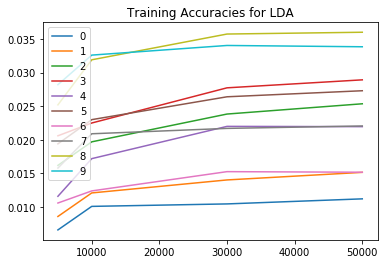

In [64]:
plt.plot(sample_sizes, train_error0, label= 0)
plt.plot(sample_sizes, train_error1, label = 1)
plt.plot(sample_sizes, train_error2, label = 2)
plt.plot(sample_sizes, train_error3, label = 3)
plt.plot(sample_sizes, train_error4, label = 4)
plt.plot(sample_sizes, train_error5, label = 5)
plt.plot(sample_sizes, train_error6, label = 6)
plt.plot(sample_sizes, train_error7, label = 7)
plt.plot(sample_sizes, train_error8, label = 8)
plt.plot(sample_sizes, train_error9, label = 9)
plt.title('Training Accuracies for LDA')
plt.legend();

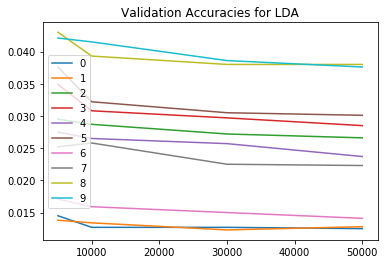

In [65]:
plt.plot(sample_sizes, validation_error0, label= 0)
plt.plot(sample_sizes, validation_error1, label = 1)
plt.plot(sample_sizes, validation_error2, label = 2)
plt.plot(sample_sizes, validation_error3, label = 3)
plt.plot(sample_sizes, validation_error4, label = 4)
plt.plot(sample_sizes, validation_error5, label = 5)
plt.plot(sample_sizes, validation_error6, label = 6)
plt.plot(sample_sizes, validation_error7, label = 7)
plt.plot(sample_sizes, validation_error8, label = 8)
plt.plot(sample_sizes, validation_error9, label = 9)
plt.title('Validation Accuracies for LDA')
plt.legend();

The digit that was easiest to classify was number 0, with 1 very close, probably because 
they are very simple/distinguishable.

In [42]:
def results_to_csv(y_test, name):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv(name + 'submission.csv', index_label='Id')


In [44]:
results_to_csv(mnist_preds, 'mnist')

My kaggle username is ayee, and my optimal score was .88300.

\pagebreak

d)

In [87]:
#LDA on SPAM

spam_test_df = pd.DataFrame(spam['test_data']).fillna(0).replace([np.inf, -np.inf], 0)
spam_train = spam['training_data']
spam_train_labels = spam['training_labels']

spam_train_df = pd.DataFrame(spam_train).fillna(0).replace([np.inf, -np.inf], 0)
print(spam_train.shape)

#match labels with images
spam_train_labels_df = pd.DataFrame(spam_train_labels).fillna(0).replace([np.inf, -np.inf], 0)


#test submission
spam_train_df['labels'] = spam_train_labels_df[0]
    
#find mean for each class
mu = spam_train_df.groupby(['labels']).apply(lambda x: x.drop('labels', axis=1).mean()).values
    
#find covariance matrix for each class
Sigmas = spam_train_df.groupby('labels').apply(lambda x: np.cov(x.drop('labels', axis=1), rowvar=False, bias=True))
    
#find average covariance matrix
Sigma = np.mean(Sigmas)
    
eigvals, eigvecs = np.linalg.eig(Sigma) 

#find value to add to diagonal
min_val = min([eigval for eigval in eigvals if eigval > 1e-6])
    
i = 0
for row in Sigma:
    row[i] += min_val
    i += 1
        
Sigma_inv = np.linalg.solve(Sigma, np.eye(32))

    
p0 = lda(mu[0], Sigma_inv, spam_test_df.values.T, len(spam_train_labels_df[spam_train_labels_df[0]==0])/5172)
p1 = lda(mu[1], Sigma_inv, spam_test_df.values.T, len(spam_train_labels_df[mnist_train_labels_df[0]==1])/5172)

    
probs = pd.DataFrame({0:p0, 1:p1}).T
spam_preds = probs.idxmax()

(5172, 32)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [88]:
results_to_csv(spam_preds, 'spam')

Optimal score: 0.77347
My username is ayee
I did not use any other features because was in a rush